# Happy Detector

This is an example of binary classification using CNN.
Data and function to load the data: https://www.kaggle.com/datasets/iarunava/happy-house-dataset?resource=download

The idea is to train a model that can detect if someone is happy or not and only lets them inside the house if they are smiling, like these: 😆 😀 😁

Keras Sequential API and functions are used to build the simple CNN. 


In [1]:
import math
import os
import random
import numpy as np
import h5py
from keras import regularizers,optimizers
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
%matplotlib inline



### The function below is from Kaggle link above. 
with minor modification based on location of the file. 

In [2]:
def load_dataset(path_to_train = '\Data\HappyDataSet\\train_happy.h5', path_to_test = '\Data\HappyDataSet\\test_happy.h5'):
    train_dataset = h5py.File(os.getcwd() + path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(os.getcwd() + path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

### We load the data that is already split into Train and Test sets
You can give the path to datafiles that you download in the load_dataset(path_train, path_test) in the next block
#### Normalization:
For images, mean variance normalization is not used for normalization and instead they are typically divided by the max range of the values

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

# Normalize
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Change the shape for labels
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("# trainings = " + str(X_train.shape[0]))
print ("# tests  = " + str(X_test.shape[0]))


# trainings = 600
# tests  = 150


#### Usually we must check the shape of the data that is loaded and inspect/visualize some of them together with their labels

X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


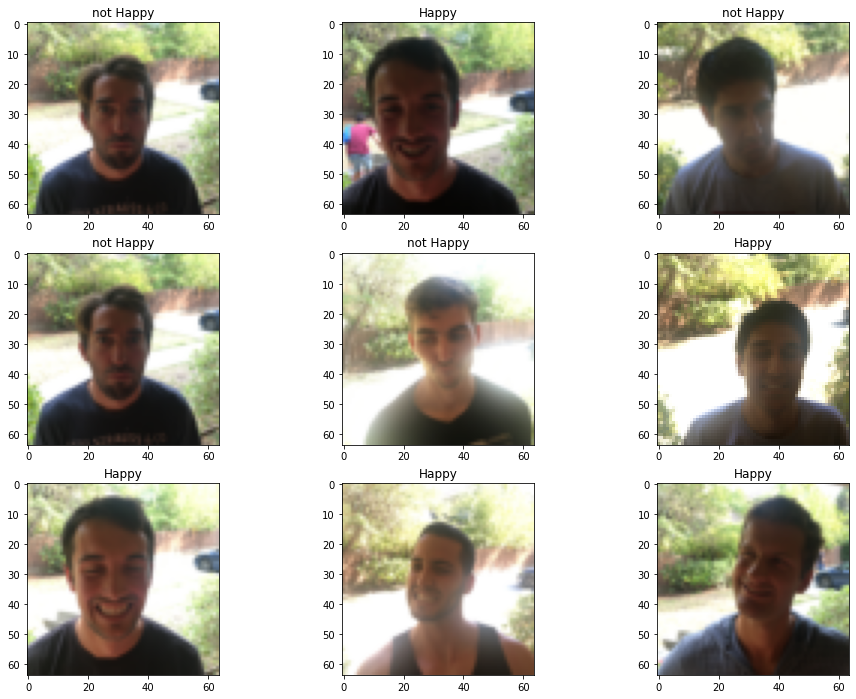

In [4]:
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

fig, ax = plt.subplots(3, 3, figsize=(16, 12))
for i in range(9):
    r = random.randint(0, X_train.shape[0])
    ax[i // 3, i % 3].imshow(X_train_orig[r])
    label = 'Happy' if Y_train[r][0] == 1 else 'not Happy' 
    ax[i // 3, i % 3].set_title(label)

## We build the model using Tensorflow Keras here

Different models can be experimented. What is used here as an example is:
 - Conv2D, 32 x (7 x 7), same padding, regularization, and ReLu activation 
 - Dropout. Very important try to remove this layer and check the training fit and evaluation on test
 - Conv2D, 32 x (3 x 3), same padding, and ReLu activation
 - MaxPooling, default (2 x 2) - reduces the size of x & y by half for all the filter layers
 - Flatten - results is 32 x 32 x 32 = 32769 size layer

In [5]:
def Model():
    model = tf.keras.Sequential([
            tfl.Conv2D(32, kernel_size=(7,7), input_shape=(64,64,3),padding ='same',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),activation='relu'),
            tfl.Dropout(0.2),
            tfl.Conv2D(32, kernel_size=(3,3), padding ='same',activation='relu'),
            tfl.MaxPool2D(),
            tfl.Flatten(),
            tfl.Dense(1, activation = "sigmoid")
            ])
    return model

#### We must always check the summary of the model to see if it makes sense:

In [6]:
HD_model = Model()

HD_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1)                 32769     
                                                        

### Now we try to train the model

Usual ADAM optimizer and binary crossentropy loss are used:

Epoch 1/25
19/19 [==============================] - 2s 73ms/step - loss: 0.7144 - accuracy: 0.5433
Epoch 2/25
19/19 [==============================] - 1s 74ms/step - loss: 0.6123 - accuracy: 0.6483
Epoch 3/25
19/19 [==============================] - 1s 74ms/step - loss: 0.5416 - accuracy: 0.7200
Epoch 4/25
19/19 [==============================] - 1s 73ms/step - loss: 0.3895 - accuracy: 0.8300
Epoch 5/25
19/19 [==============================] - 1s 72ms/step - loss: 0.3347 - accuracy: 0.8617
Epoch 6/25
19/19 [==============================] - 1s 74ms/step - loss: 0.2741 - accuracy: 0.8883
Epoch 7/25
19/19 [==============================] - 1s 78ms/step - loss: 0.2320 - accuracy: 0.9167
Epoch 8/25
19/19 [==============================] - 1s 73ms/step - loss: 0.2750 - accuracy: 0.8733
Epoch 9/25
19/19 [==============================] - 1s 75ms/step - loss: 0.1862 - accuracy: 0.9383
Epoch 10/25
19/19 [==============================] - 1s 74ms/step - loss: 0.1754 - accuracy: 0.9350
Epoch 11/

Text(0.5, 1.0, 'Loss vs. Epoch')

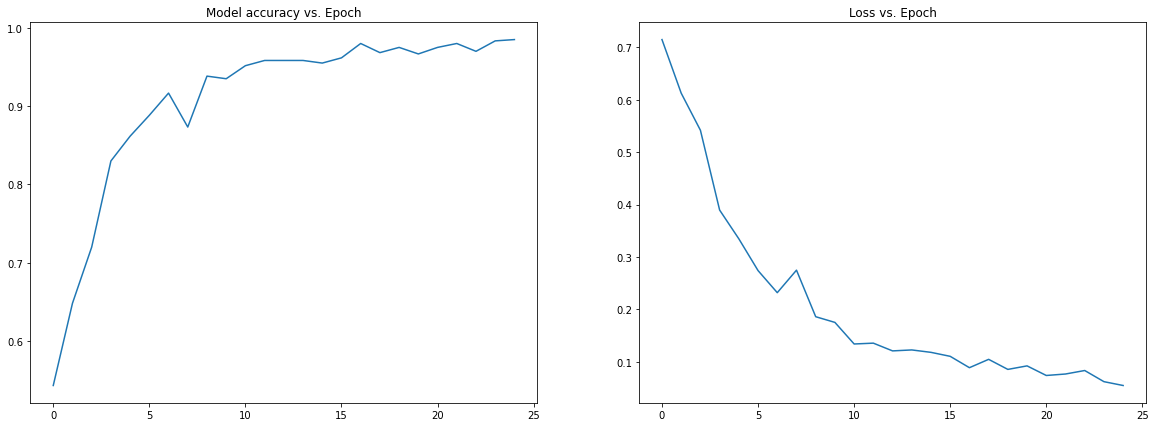

In [7]:
HD_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_history = HD_model.fit(X_train, Y_train, epochs=25, batch_size=32)

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(model_history.history['accuracy'])
ax[0].set_title('Model accuracy vs. Epoch')
ax[1].plot(model_history.history['loss'])
ax[1].set_title('Loss vs. Epoch')


In [8]:
test_eval = HD_model.evaluate(X_test, Y_test)
print("Test Accuracy is " + str(test_eval[1]))
print("Loss is " + str(test_eval[0]))



5/5 [==============================] - 0s 8ms/step - loss: 0.1394 - accuracy: 0.9533
Test Accuracy is 0.95333331823349
Loss is 0.1394411325454712


## Please try to remove Dropout layer from the model and see what happens :)

### Other notes:
- This may be a simple example to try different optimizers and get a feel of performance when using other optimizers
- Usually using higher resolution images can improve accuracy, it is not free as model size and parameters would be increased
- On my system it took 10 sec to run 25 epocs and results in 95% accuracy of test set.